In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(r'E:\data set\test.csv')

df.head()

,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-02,0,0,851
2,2019-01-03,0,0,840
3,2019-01-04,0,0,842
4,2019-01-05,0,0,845


In [5]:

# Assuming 'number_sold' is the column you want to predict
data = df['number_sold'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

Prepare Time-Series Sequences

In [6]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Example sequence length
X, y = create_sequences(data_scaled, seq_length)


Define and Train the Basic RNN Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Bidirectional
import matplotlib.pyplot as plt

# Define and Train the Basic RNN Model 
model_basic = Sequential()
model_basic.add(SimpleRNN(50, input_shape=(X.shape[1], 1)))
model_basic.add(Dense(1))
model_basic.compile(optimizer='adam', loss='mean_squared_error')
history_basic = model_basic.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


c:\Users\Syed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0049 - val_loss: 2.4452e-04
Epoch 2/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.0372e-04 - val_loss: 2.7657e-04
Epoch 3/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.1730e-04 - val_loss: 3.9638e-04
Epoch 4/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.2650e-04 - val_loss: 2.5212e-04
Epoch 5/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.6033e-04 - val_loss: 2.5365e-04
Epoch 6/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8528e-04 - val_loss: 4.4624e-04
Epoch 7/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.8022e-04 - val_loss: 5.2442e-04
Epoch 8/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.9301e-04 - val_loss: 3.1750e-04
Epoch 9/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.8557e-04 - val_loss: 2.8446e-04
Epoch 10/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.1554e-04 - val_loss: 3.0303e-04


Define and Train the Bi-Directional RNN Model

In [17]:

# Define and Train the Stacked RNN Model 
model_stacked = Sequential()
model_stacked.add(SimpleRNN(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_stacked.add(SimpleRNN(50))
model_stacked.add(Dense(1))
model_stacked.compile(optimizer='adam', loss='mean_squared_error')
history_stacked = model_stacked.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0055 - val_loss: 6.7076e-04
Epoch 2/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.1200e-04 - val_loss: 2.7677e-04
Epoch 3/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.8067e-04 - val_loss: 2.4759e-04
Epoch 4/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.1763e-04 - val_loss: 4.2181e-04
Epoch 5/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.3522e-04 - val_loss: 2.5463e-04
Epoch 6/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.4864e-04 - val_loss: 6.7077e-04
Epoch 7/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.3657e-04 - val_loss: 2.6065e-04
Epoch 8/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4.3862e-04 - val_loss: 2.7577e-04
Epoch 9/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 4.1536e-04 - val_loss: 5.8238e-04
Epoch 10/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.9671e-04 - val_loss: 4.8444e-04


 Evaluate and Compare Models

In [18]:
# Define and Train the Bi-Directional RNN Model (Ensure this part is executed successfully)
model_bidirectional = Sequential()
model_bidirectional.add(Bidirectional(SimpleRNN(50, return_sequences=True), input_shape=(X.shape[1], 1)))
model_bidirectional.add(SimpleRNN(50))
model_bidirectional.add(Dense(1))
model_bidirectional.compile(optimizer='adam', loss='mean_squared_error')
history_bidirectional = model_bidirectional.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10


c:\Users\Syed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


639/639 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.1081 - val_loss: 2.4232e-04
Epoch 2/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.9105e-04 - val_loss: 2.5509e-04
Epoch 3/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 4.7515e-04 - val_loss: 2.4623e-04
Epoch 4/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 4.7554e-04 - val_loss: 5.9409e-04
Epoch 5/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 5.0862e-04 - val_loss: 3.3342e-04
Epoch 6/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 4.5614e-04 - val_loss: 3.9827e-04
Epoch 7/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 4.3322e-04 - val_loss: 2.7734e-04
Epoch 8/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.1410e-04 - val_loss: 4.8365e-04
Epoch 9/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.0647e-04 - val_loss: 2.4737e-04
Epoch 10/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.0568e-04 - val_loss: 3.8602e-04
799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.1947e-04
799/799 ━━━━

In [19]:
# Evaluate models
loss_basic = model_basic.evaluate(X, y)
loss_stacked = model_stacked.evaluate(X, y)
loss_bidirectional = model_bidirectional.evaluate(X, y)

print(f'Basic RNN Loss: {loss_basic}')
print(f'Stacked RNN Loss: {loss_stacked}')
print(f'Bi-Directional RNN Loss: {loss_bidirectional}')

799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1947e-04
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.8115e-04
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.4872e-04
Basic RNN Loss: 0.0003909253282472491
Stacked RNN Loss: 0.000546824827324599
Bi-Directional RNN Loss: 0.000521056994330138


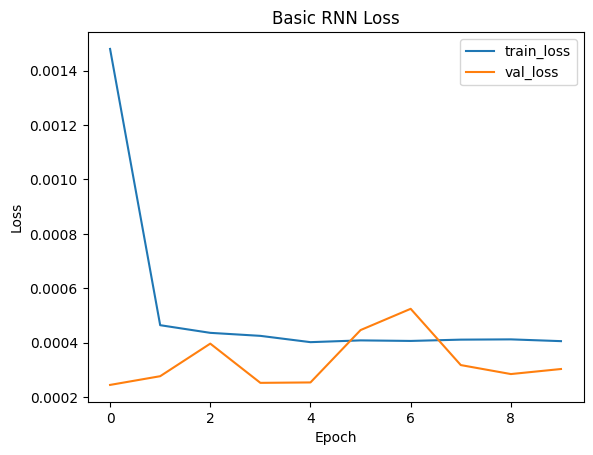

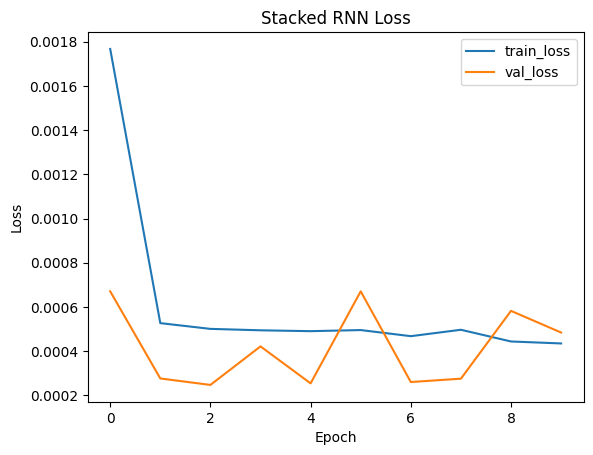

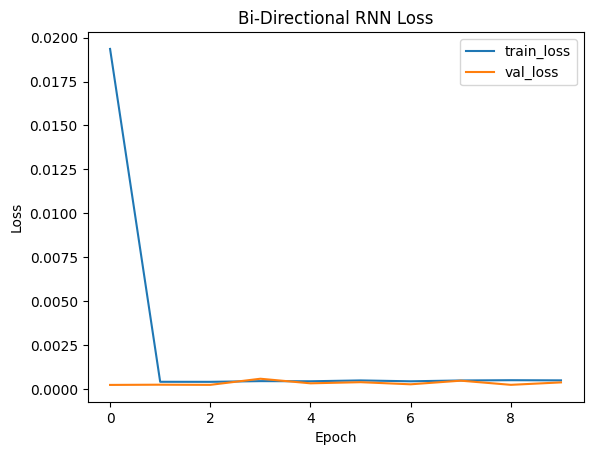

In [20]:
import matplotlib.pyplot as plt

# Plotting function
def plot_loss(history, model_name):
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot loss for each model
plot_loss(history_basic, 'Basic RNN')
plot_loss(history_stacked, 'Stacked RNN')
plot_loss(history_bidirectional, 'Bi-Directional RNN')
